# Lab 9

Today is a second day of vocabularies. Today we will examine _parameters_ and _hyperparameters_ and acquaint ourselves with the idea of parameters stored as vectors. Today's goals are:

0. Compare and contrast parameters and hyper-parameters
1. Explore how parameters can be viewed and interacted with as vectors 
2. Discuss grid search



## Before we start

The first part of this lab revisits all the algorithms and methods that we have explored so far. Let's start by making a list of each method so far, noting 1) the kind (supervised vs. unsupervised), 2) the inputs needed to use the method (other than data), and 3) any other numbers that are involved or set during that method. 

We'll use this listing in our following discussions. I'll do the first one: 


<table>
<thead>
<tr>
<th>Method/Algorithm</th>
    <th>Type</th>
    <th>Inputs</th>
    <th>Numbers set/involved</th>
</tr>
</thead>
<tbody>
<tr>
<th>k-means</th>
    <td>unsupervised </td>
    <td>$k$</td>
    <td>labels, cluster centers</td>
</tr>
<tr>
<th>kNN</th>
    <td>supervised</td>
    <td>number of labeled neighbors to consult</td>
    <td>labels for the rest of the data </td>
</tr>
<tr>
<th>PCA</th>
    <td>Type</td>
    <td>Inputs</td>
    <td>Numbers set/involved</td>
</tr>
<tr>
<th>SVD</th>
    <td>Type</td>
    <td>Inputs</td>
    <td>Numbers set/involved</td>
</tr>
<tr>
<th>Spectral Clustering</th>
    <td>Type</td>
    <td>Inputs</td>
    <td>Numbers set/involved</td>
</tr>
<tr>
<th>Regression</th>
    <td>Type</td>
    <td>Inputs</td>
    <td>Numbers set/involved</td>
</tr>
</tbody>
</table>


What kinds of inputs do we have? What trends do you notice?

(Your thoughts here)

## (Hyper-) Parameters

In most processes in machine learning, we are working to fit a model or a process to our data. This fitting involves both the data that we fit to and determining the values of various numbers. These numbers are either _parameters_ or _hyperparameters._ 

### Quick Definitions - 

* **Hyper-parameters** are numbers that are set by the researcher. These can be set without knowing anything about the data that we are fitting to.    
* **Parameters** are numbers whose values are dictated by the data. 

With these quick definitions, look back at your list from before and determine which numbers are hyper-parameters and which are parameters. Then fill in the below table. Again, I've done the first two: 

<table>
<thead>
<tr>
<th>Method/Algorithm</th>
    <th>Hyper-parameters</th>
    <th>Parameters</th>
</tr>
</thead>
<tbody>
<tr>
<th>k-means</th>
    <td> k </td>
    <td> - </td>

</tr>
<tr>
<th>kNN</th>
    <td>k</td>
    <td>-</td>
</tr>
<tr>
<th>PCA</th>
    <td>Hyper-parameters</td>
    <td>Parameters</td>
</tr>
<tr>
<th>SVD</th>
    <td>Hyper-parameters</td>
    <td>Parameters</td>
</tr>
<tr>
<th>PCA</th>
    <td>Hyper-parameters</td>
    <td>Parameters</td>
</tr>
<tr>
<th>Spectral Clustering</th>
    <td>Hyper-parameters</td>
    <td>Parameters</td>
</tr>
<tr>
<th>Regression</th>
    <td>Hyper-parameters</td>
    <td>Parameters</td>
</tr>
</tbody>
</table>


### Setting Parameters

Setting parameters is easier of the two types. Usually you use an algorithm or method (like linear regression) that has a process for setting the parameters (ie. the slope $m$ and the intercept $b$) given the data. Essentially, once you have made your choices regarding method and hyper-parameter values, then the data will finish the determination for the parameters. 

### Choosing Hyper-Parameters

Selecting the value for hyper-parameters must come before you can apply your method. For example, you cannot run k-means without a value for $k$. Choosing these values is more of an art because -- unlike setting parameters -- your data can't tell you the best choice. You might be able to make an educated guess by visualizing the data. 

There is no one right way to choose your hyper-parameters, but you can apply external evaluation or validation techniques to assist you in this choice. So far, we have used elbowology in combination of some external notion of "goodness." For each possible value for the hyper-parameter, we calculated our notion of "goodness" and we selected the one that creates the deepest "elbow" when we graph the possible values for the hyper-parameter against the resulting "goodness" value.

>"Wait, wait, wait. You said the data couldn't tell us what value the hyper-parameter should be." -- A natural human reaction 

This reaction is absolutely appropriate. While we use data to compute the notion of "goodness", there is no accepted way to determine where the elbow of your graph of "goodness" values is. That decision still requires finesse on the part of the researcher. So no, the data doesn't "tell" us what the value should be, but we do certainly use the data to make a reasonable decision about our hyper-parameters.

#### An Imperfect metaphor
One (imperfect) metaphor is deciding hyper-parameters is akin to choosing the type of clothing - dress, shirt, pants - and the parameters are then set by the tailor fitting the clothing to the person wearing it. The tailor does not fundamentally change the garment, but rather adjusts the lengths of various aspects of the garment to fit the person.


### Methods with both Hyper-Parameters and Parameters

Many methods have both hyper-parameters and parameters. This speaks to our intuition that we need to make some decisions before we deploy a method and then have some pieces tuned (or fit more closely) to our particular situation. 

**Question** - Which of the methods that we have seen have both hyper-parameters and parameters?

## Importing for coding pieces

This section is just importing packages and data as well as defining the functions that we need for later in this lab. You just need to run the next 3 blocks. For now, just skip over the fourth block. 

In [7]:
# Import block
%matplotlib notebook 

import matplotlib.pyplot as plt
from mpl_toolkits import mplot3d 
import seaborn as sns; sns.set()

import numpy as np
import pandas as pd

In [2]:
# Import Data for this Lab

employ_data = pd.read_csv("lab9data.csv", sep = ",")

## numpy vectors of our inputs
neuro = employ_data[["neuroticism"]].to_numpy()
perform = employ_data[["performance"]].to_numpy()

In [3]:
# Functions for later use

def draw_vector(v0, v1, ax=None):
    ax = ax or plt.gca()
    arrowprops=dict(arrowstyle='->',
                    linewidth=2,
                    shrinkA=0, shrinkB=0, color="lightblue")
    ax.annotate('', v1, v0, arrowprops=arrowprops)
    
def place_parameter(p_vec, col, ax=None):
    plt.scatter(p_vec[0],p_vec[1], c=col, marker = "*")
    
def draw_parameter_path(p0,p1, col, ax=None):
    ax = ax or plt.gca()
    arrowprops=dict(arrowstyle='->',
                    linewidth=2,
                    shrinkA=0, shrinkB=0, color=col)
    ax.annotate('', p1, p0, arrowprops=arrowprops)   
    
def compute_mse(truth_vec, predict_vec):
    pass

In [ ]:
# For function testing 




## Parameters as vectors

We can think of our *parameters* as a list of values with each value existing on its own numberline that is separate from every other parameters' numberlines. The issue with this view is that we see the parameters as disconnected from each other. Another view is to consider the parameters as vectors. 

Take our example from last time, we were fitting lines to our data. In this example we have two parameters $m$ (the slope of a line) and $b$ (the intercept or where the line crosses the $x = 0$ line). We can see these two parameters as a vector $[m,b]$ defined for this "parameter" space.

<IPython.core.display.Javascript object>


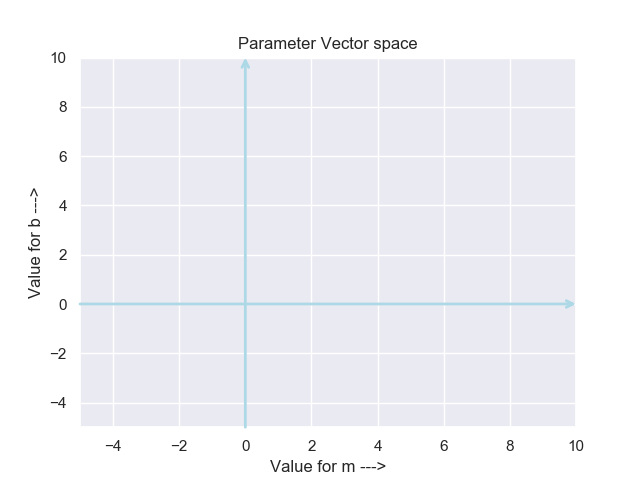

Text(0.5, 1.0, 'Parameter Vector space')

In [5]:
fig = plt.figure()

# Set axis limits
xmin = -5
xmax = 10
ymin = -5
ymax = 10

plt.xlim([xmin, xmax])
plt.ylim([ymin, ymax])

# Build axes
draw_vector([xmin,0], [xmax,0])
draw_vector([0,ymin], [0,ymax])

# Create grid and labels
plt.grid(True)
plt.xlabel('Value for m --->')
plt.ylabel('Value for b --->')
plt.title('Parameter Vector space')

# Don't forget to "turn the power off" on this plot before moving on

Let's pull the $m$ and $b$ values for our first two lines that we made last time and place them in this space. 

<IPython.core.display.Javascript object>


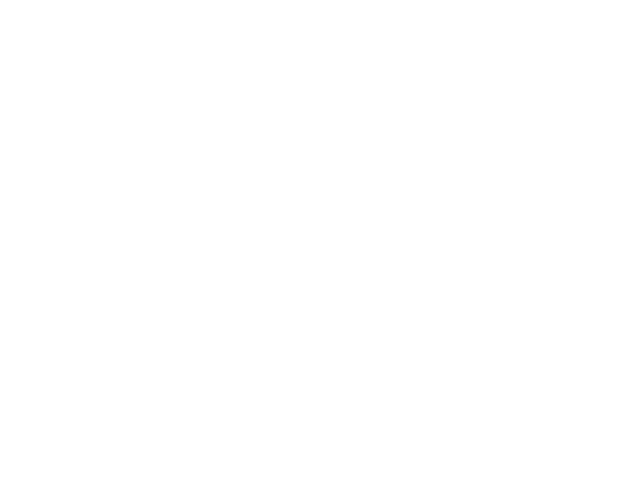

NameError: name 'm2' is not defined

In [6]:
fig = plt.figure()

# Set axis limits
xmin = -5
xmax = 10
ymin = -5
ymax = 10

plt.xlim([xmin, xmax])
plt.ylim([ymin, ymax])

# Build axes
draw_vector([xmin,0], [xmax,0])
draw_vector([0,ymin], [0,ymax])

# Add your m's and b's from Lab 08:
place_parameter([m2,b2],"red")
place_parameter([m4,b4],"green")

# Create grid and labels
plt.grid(True)
plt.xlabel('Value for m --->')
plt.ylabel('Value for b --->')
plt.title('Parameter Vector space')

In this view and at this point, we have no information about how these parameters relate to the data. Today, we will perform a _grid search_ and build a surface that will connect our parameters to the data. 

### Grid Search

In a grid search, we create a list for each parameter that we want to investigate and then we create a grid that encapsulates all combinations of values from these parameter lists.

<table>
<thead>
<tr>
    <th></th>
<th>m = 0</th>
    <th>m = 0.5</th>
    <th>m = 1.5</th>
    <th>m = 2</th>
    <th>...</th>
</tr>
</thead>
<tbody>
<tr>
<th>b = 0</th>
    <td>(0,0) </td>
    <td>(0,0.5)</td>
    <td>(0,1.5) </td>
    <td>(0,2)</td>
    <td>(0,...) </td>
</tr>
<tr>
<th>b = 1/3</th>
    <td>(1/3,0) </td>
    <td>(1/3,0.5)</td>
    <td>(1/3,1.5) </td>
    <td>(1/3,2)</td>
    <td>(1/3,...) </td>
</tr>
<tr>
<th>b = 2/3</th>
    <td>(2/3,0) </td>
    <td>(2/3,0.5)</td>
    <td>(2/3,1.5) </td>
    <td>(2/3,2)</td>
    <td>(2/3,...) </td>
</tr>
<tr>
<th>b = 1</th>
    <td>...</td>
    <td>...</td>
    <td>...</td>
    <td>...</td>
    <td>...</td>
</tr>
<tr>
<th>b = 4/3</th>
    <td>...</td>
    <td>...</td>
    <td>...</td>
    <td>...</td>
    <td>...</td>
</tr>
</tbody>
</table>


In a grid search, we then replace each entry with some evaluation metric relating to how those parameters do predicting our data. 

For example, we would use the listed $m$ and $b$ to build a line `perform_guess = m*neuro_score + b`. Then we would compare the guesses for the performance scores to the ground truth. Today we will use the _mean squared error_ for this comparison:

$MSE(truth, guess) = avg(truth - guess)^2$

In the function block above, there is a fourth function that has only `pass` in the body of the function. Fill in the details for taking in a vector of truth and a vector of predictions and returning the average of the squared difference between them. Use the `function testing` block to check your function. 

#### Creating evaluation matrix

_Note:_ We are not making the full use of the power of `numpy` in this section. We are doing this the brute force way to better understand what each step is doing in the grid search. 

To create the evaluation matrix, we need to:
1. Create the range of parameter values that we are interested in
2. Try all possible combinations of the parameters in our model
3. Store how "well" those parameters do




In [ ]:
# Set the possible values for our parameters
m_vec = np.arange(-3, 10, 0.1)
b_vec = np.arange(-2, 60, 0.2)

# Create a place to store the values 
# HINT - Look at the above matrix! 
eval_mat = 

# Try (or loop) over all possible combinations
# HINT think nested



Our goal is that our MSE is close to zero. In this evaluation matrix, we could simply find the minimum and use those parameters. 

In [ ]:
# Take a peek at your results

plt.imshow(eval_mat,cmap='viridis')       

Ummmm... What does this mean? 

Instead let's look at this matrix as a 3D object (also known as a surface) instead. To do that, we'll use some of the tricks from Lab 5 combined with `meshgrid`. 

In [ ]:
fig = plt.figure()
ax = plt.axes(projection='3d')
bs,ms = np.meshgrid(b_vec,m_vec)

# Create the SCATTER() plot with colors
ax.plot_surface(ms,bs, eval_mat, cmap='viridis',edgecolor='none');


Our goal is that our MSE is close to zero. In this evaluation matrix, we could simply find the minimum and use those parameters.

In [ ]:
ind = np.unravel_index(np.argmin(eval_mat, axis=None), eval_mat.shape)

# Trick from example on https://docs.scipy.org/doc/numpy/reference/generated/numpy.argmin.html

In [ ]:
print("Minimum of eval_mat is", eval_mat[ind], "\n")
print("This min is found at m =", ms[ind], "and b=", bs[ind])

So why are we plotting anything at all? Well, grid search is not the most efficient way to search for parameters. So what could be alternative? 

Notice, we have not actually computed a linear regression. Instead we have the form of the output ($y = m*x +b$) and have been just putting parameters into the $m$ and $b$ places. So how could we do this kind of "blind" search better? 

#### Gradient Descent....

NEXT WEEK! 

#### Resources consulted 

1. [Linear Regression using Gradient Descent](https://towardsdatascience.com/linear-regression-using-gradient-descent-97a6c8700931)
2. [How to Create an Empty Figure with Matplotlib in Python](http://www.learningaboutelectronics.com/Articles/How-to-create-an-empty-figure-with-matplotlib-in-Python.php)
3. [Findobj Demo](https://matplotlib.org/3.1.1/gallery/misc/findobj_demo.html#sphx-glr-gallery-misc-findobj-demo-py)
4. [3d plots in matplotlib](https://matplotlib.org/mpl_toolkits/mplot3d/tutorial.html)
5. [meshgrid in matplotlib](https://docs.scipy.org/doc/numpy/reference/generated/numpy.meshgrid.html)
6. [argmin in numpy](https://docs.scipy.org/doc/numpy/reference/generated/numpy.argmin.html)
7. [Three-Dimensional Plotting in Matplotlib](https://jakevdp.github.io/PythonDataScienceHandbook/04.12-three-dimensional-plotting.html)